In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib.ticker import MultipleLocator

In [2]:
#Below from Cori 1k run (probably)
#dist_numpy = np.load('/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/plots/mar19_1k_15M_networks_BZPT-64-Nodes-1024-LR-12_converge_19993063_chan_2-numpy_posterior.npy')
# Below from Edison 1K run 
#dist_numpy = np.load('/global/project/projectdirs/dasrepo/etalumis/plots/ic_posteriors-parallel-combined/15M_networks_BZPT-1024-Nodes-64-LR-50_converge_larc_poly2_20082689_chan_2-combine-numpy_posterior.npy')
#Below from previous best
#chan2
#chan3
#dist_numpy = np.load('/global/project/projectdirs/dasrepo/etalumis/plots/ic_chan3_1_combined_all_feb21cpu_plotfeb28_numpy_posterior.npy')
#rmh_numpy = np.load('/global/project/projectdirs/dasrepo/etalumis/plots/rmh_prior_chan3-numpy.npy')
#ground = np.load('/global/project/projectdirs/dasrepo/etalumis/plots/gt_chan3_1.npy')

#chan11 
#dist_numpy = np.load('/global/project/projectdirs/dasrepo/etalumis/plots/ic_chan11_2_combined_all_feb21cpu_plotfeb28_numpy_posterior.npy')
#rmh_numpy = np.load('/global/project/projectdirs/dasrepo/etalumis/plots/rmh_prior_chan11-numpy.npy')



In [3]:
def plot_dist(run):
    chan=2
    try: 
        dist_numpy = np.load('/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/plots/ic_posteriors-parallel-combined/Apr12_hpo_lstm_dim_512_lstm_depth_1_proposal_mixture_components_5_chan{chan}_{run}-numpy_posterior.npy'.format(run=run,chan=chan))
        rmh_numpy = np.load('/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/plots/ic_posteriors-parallel-combined/Apr25_rmh_gt_chan{chan}_{run}-numpy.npy'.format(run=run,chan=chan))
    except:
        print('problem loading')
        return
#    rmh_numpy = np.load('/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/plots/ic_posteriors-parallel-combined/Apr25_rmh_gt_chan2_%s-numpy.npy' % run )
    ground = np.load('/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/numpys/gt_Apr25_chan{chan}_{run}.npy'.format(run=run,chan=chan))

    num_traces =  dist_numpy.shape[0]
    num_traces_rmh =  rmh_numpy.shape[0]

    ground_truth_trace='/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/plots/gt_chan2_1.npy'

    mother           = dist_numpy[:,:3]
    mother_rmh       = rmh_numpy[:,:3]
    channel          = dist_numpy[:,3]
    channel_rmh      = rmh_numpy[:,3]
    final            = dist_numpy[:,4:4+(30*8)].reshape(num_traces,30,8)
    final_rmh            = rmh_numpy[:,4:4+(30*8)].reshape(num_traces_rmh,30,8)
    finalfilt        = [np.array(sorted(f[f>-9999].reshape(-1,8), key=lambda x: -x[3])) for f in final]
    finalfilt_rmh        = [np.array(sorted(f[f>-9999].reshape(-1,8), key=lambda x: -x[3])) for f in final_rmh]
    finalmult        = np.array([f.shape[0] for f in finalfilt])
    obs              = dist_numpy[:,4+(30*8):].reshape(num_traces,35,35,20)
    #particle_types   = np.array([nhad_nem_ninvis(f[:,6],f[:,7]) for f in finalfilt])
    if ground is not None:
            g_mother         = ground[:3]
            g_channel        = ground[3]
            g_final          = ground[4:4+(30*8)].reshape(30,8)
            g_finalfilt      = np.array(sorted(g_final[g_final>-9999].reshape(-1,8), key=lambda x: -x[3]))
            g_finalmult      = g_finalfilt.shape[0]
            g_obs            = ground[4+(30*8):].reshape(35,35,20)
    #            g_particle_types = nhad_nem_ninvis(g_finalfilt[:,6],g_finalfilt[:,7])


    ax1 = plt.subplot2grid(shape, (run, 0))
    ax2 = plt.subplot2grid(shape, (run, 1))
    ax3 = plt.subplot2grid(shape, (run, 2))

    motheraxes = [ax1,ax2,ax3]
    channelax   = plt.subplot2grid(shape, (run, 5), colspan=1)        
        # ## tau momentum
    axarr = motheraxes
    colors = mpl.cm.inferno(np.linspace(0,1,5))[1:-1]

    titles = ['τ px','τ py','τ pz']
    limits = [[-3,3],[-3,3],[43,47]]

    for i,(lim,ax,c,t) in enumerate(zip(limits,axarr,colors,titles)):
        n,_,h = ax.hist(mother[:,i], density=True, bins = np.linspace(*(lim+[11])), fill=False,facecolor=c,edgecolor=c)
        n,_,h = ax.hist(mother_rmh[:,i], density=True, bins = np.linspace(*(lim+[11])), fill=True,facecolor=c,edgecolor=c,alpha=0.5)
        ymax = 1.5*np.max(n)
        if ground_truth_trace is not None:
            l = ax.vlines(g_mother[i],0,ymax, linestyles='dashed')
    # ax.legend([l,h[0]],['ground truth','posterior'])
        ax.set_xlim(*lim)
        if (run==1): ax.set_title(t)
        ax.set_ylim(0,ymax)


    energies = np.array([f[:2] for f in finalfilt])
    energies_rmh = np.array([f[:2] for f in finalfilt_rmh])

    ax4 = plt.subplot2grid(shape, (run, 3))
    h = ax4.hist(energies[:,0,3],bins = np.linspace(0,40,11), facecolor = 'blue', density=True, fill=False,edgecolor='blue')
    h = ax4.hist(energies_rmh[:,0,3],bins = np.linspace(0,40,11), facecolor = 'blue', density=True,alpha=0.5)
    ax5 = plt.subplot2grid(shape, (run, 4))
    h = ax5.hist(energies[:,1,3],bins = np.linspace(0,40,11), facecolor = 'blue', density=True, fill=False,edgecolor='blue')
    h = ax5.hist(energies_rmh[:,1,3],bins = np.linspace(0,40,11), facecolor = 'blue', density=True,alpha=0.5)
    if ground_truth_trace is not None:
        l = ax4.vlines(g_finalfilt[:3][0,3],0,1, linestyles='dashed')
        l = ax5.vlines(g_finalfilt[:3][1,3],0,1, linestyles='dashed')
    ax4.set_ylim(0,1.5*np.max(h[0]))
    ax4.set_xlim(0,40)
    if (run==1): ax4.set_title('FSP Energy {}'.format(0 + 1))
    ax5.set_ylim(0,1.5*np.max(h[0]))
    ax5.set_xlim(0,40)
    if (run==1):ax5.set_title('FSP Energy {}'.format(1 + 1))

    ax = channelax
    ch = ax.hist(channel, np.linspace(-0.5,35.5,37), density=True, fill=False, facecolor = 'grey',edgecolor='grey')
    ch = ax.hist(channel_rmh, np.linspace(-0.5,35.5,37), density=True, facecolor = 'grey',alpha=0.5)
    if ground_truth_trace is not None:
        l = ax.vlines(g_channel,0,1.0, linestyles='dashed')
    ax.set_ylim(0.,1.0)
    ax.set_xlim(-1, 24)
    # ax.legend([l,ch[2][0]],['ground truth','posterior'])
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    if (run==1): ax.set_title('Decay Channel')


    

1
2
3
4
5
6
7
8
9


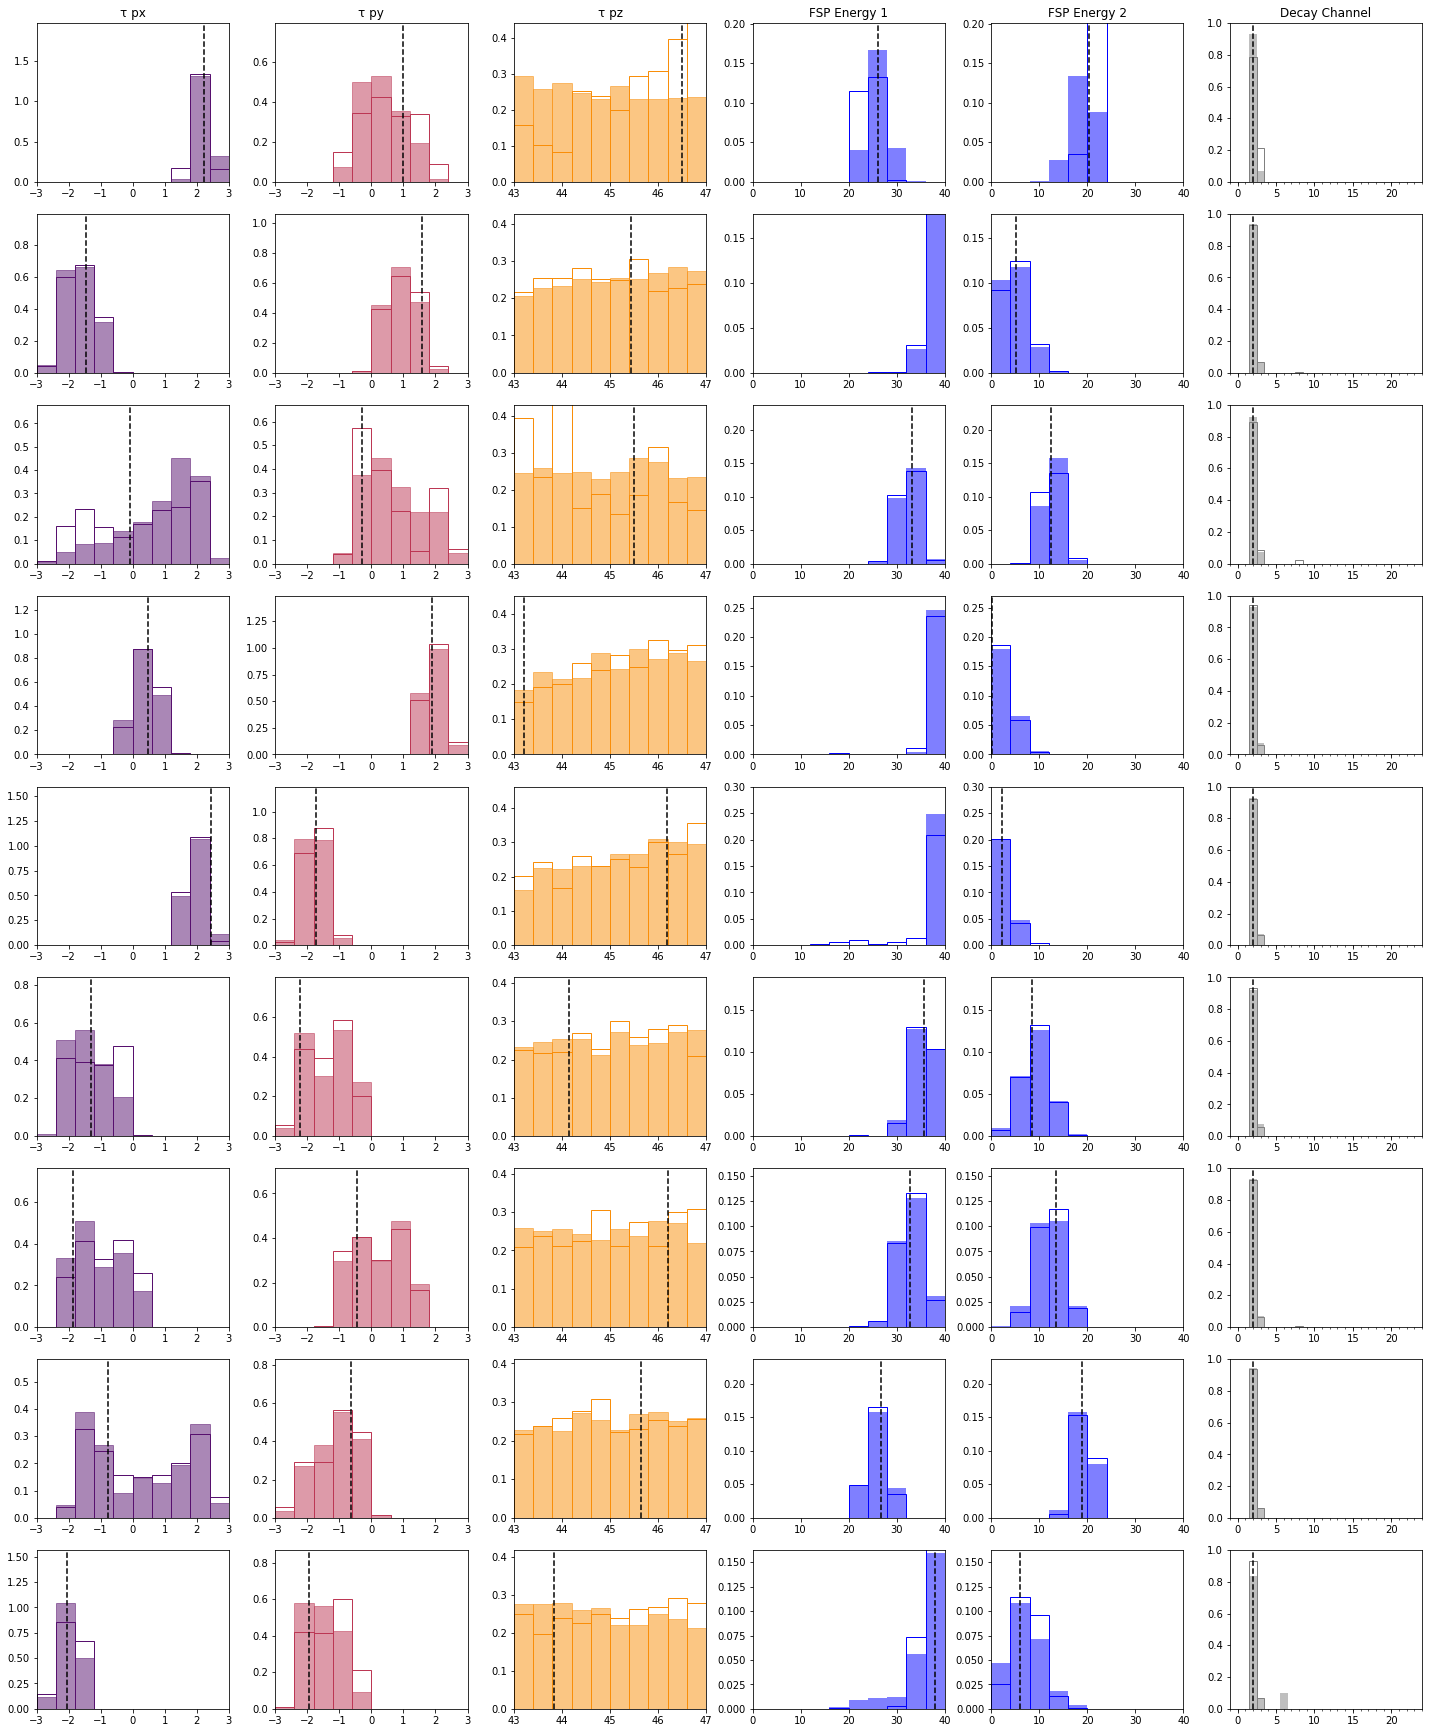

In [4]:
f = plt.figure()
f.set_size_inches(20,28)
shape = (10,6)
for run in range(1,10):
    print(run)
    plot_dist(run)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
f.savefig('eta_physics_chan22_multi.pdf')

In [5]:
import numpy as np
import scipy.stats
def ks_metric(x, y):
    """Negative log of the KS test p-value"""
    min_pval = np.exp(-700)
    # If either array empty, we will get errors. So we use minimum p-value
    if len(x) == 0 or len(y) == 0:
        pval = min_pval
    else:
        pval = scipy.stats.ks_2samp(x, y).pvalue
    # Clip the p-value to avoid log(0)
    if pval < min_pval: pval = min_pval
    print('pval ',pval)
    return -np.log(pval)

In [6]:
ks_metric(mother[:,0],mother_rmh[:,0])

NameError: name 'mother' is not defined